In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
import sklearn
print(sklearn.__version__)

1.2.2


# Understand dataset

In [35]:
print("oke")
import torch
print(torch.__version__)
print(torch.cuda.is_available())

oke
2.4.1+cu121
False


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/playground-series-s3e2/train.csv')
target_col = "stroke"

def format_form(df):
    if 'id' in df.columns:
        df = df.drop(columns=["id"])
    if 'gender' in df.columns:
        df = df.drop(df[df["gender"] == "Other"].index)
    df = df.drop_duplicates()
    df = df.reset_index(drop=True)

    df.columns = df.columns.str.lower()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = df[column].str.lower()
    for column in df.select_dtypes(include=['number']).columns:
        if(df[column].nunique() == 2):
            df[column] = df[column].astype(bool)
            df[column] = df[column].replace({True: 'yes', False: 'no'})

    # Get a list of column names grouped by data type
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    # Reorder the columns in the DataFrame
    new_column_order = categorical_cols + numerical_cols
    new_column_order.remove(target_col)
    new_column_order.append(target_col)
    df = df[new_column_order]

    df = df.drop_duplicates()
    df = df.reset_index(drop=True)
    return df

df = format_form(df)
df.head(5).T

,0,1,2,3,4
gender,male,male,female,male,female
hypertension,no,no,no,no,no
heart_disease,no,no,no,no,no
ever_married,yes,yes,yes,yes,no
work_type,private,private,private,private,private
residence_type,urban,rural,rural,urban,rural
smoking_status,never smoked,formerly smoked,unknown,never smoked,never smoked
age,28.0,33.0,42.0,56.0,24.0
avg_glucose_level,79.53,78.44,103.0,64.87,73.36
bmi,31.1,23.9,40.3,28.8,28.8


In [7]:
df[(df['stroke']=='yes') & (df['age']<50)]

,gender,hypertension,heart_disease,ever_married,work_type,residence_type,smoking_status,age,avg_glucose_level,bmi,stroke
158,male,no,no,yes,private,rural,smokes,32.0,100.10,41.5,yes
631,female,no,no,yes,private,rural,unknown,42.0,87.24,24.9,yes
1065,male,no,no,yes,private,rural,unknown,25.0,90.43,26.1,yes
1274,male,no,no,yes,private,rural,formerly smoked,48.0,78.46,28.3,yes
1902,male,no,no,yes,private,rural,formerly smoked,42.0,114.71,32.6,yes
2068,female,no,no,yes,private,urban,smokes,46.0,98.42,31.0,yes
2240,female,no,no,yes,private,urban,never smoked,38.0,65.42,32.0,yes
2482,female,no,no,no,private,rural,smokes,49.0,74.90,21.4,yes
2694,female,no,no,yes,private,urban,smokes,47.0,75.27,41.8,yes
3226,male,no,no,no,children,urban,unknown,10.0,93.28,18.4,yes


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15303 entries, 0 to 15302
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15303 non-null  object 
 1   hypertension       15303 non-null  object 
 2   heart_disease      15303 non-null  object 
 3   ever_married       15303 non-null  object 
 4   work_type          15303 non-null  object 
 5   residence_type     15303 non-null  object 
 6   smoking_status     15303 non-null  object 
 7   age                15303 non-null  float64
 8   avg_glucose_level  15303 non-null  float64
 9   bmi                15303 non-null  float64
 10  stroke             15303 non-null  object 
dtypes: float64(3), object(8)
memory usage: 1.3+ MB


In [38]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [39]:
median_col = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'age']
mean_col = ['avg_glucose_level', 'bmi']

In [40]:
# results = {}
# for col in median_col:
#     if df[col].dtype == 'object':  # Nếu là kiểu object (category)
#         results[col] = [df[col].mode()[0]]  # Lấy mode (giá trị xuất hiện nhiều nhất)
#     else:
#         results[col] = [df[col].median()]  # Tính median

# # Mean (cho các cột trong mean_col)
# for col in mean_col:
#     results[col] = [df[col].mean()]  # Tính mean
# results['stroke'] = '0'

# Split data

In [41]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'target_col' is the target column name
target_col = "stroke"
X = df.drop(columns=[target_col])
y = df[target_col]
y = y.replace({'yes': 1, 'no': 0})

# Split the data using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12242 entries, 3485 to 8924
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             12242 non-null  object 
 1   hypertension       12242 non-null  object 
 2   heart_disease      12242 non-null  object 
 3   ever_married       12242 non-null  object 
 4   work_type          12242 non-null  object 
 5   residence_type     12242 non-null  object 
 6   smoking_status     12242 non-null  object 
 7   age                12242 non-null  float64
 8   avg_glucose_level  12242 non-null  float64
 9   bmi                12242 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.0+ MB


In [42]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

def get_processor(X_train):
    # Define categorical and numerical features
    # Initial feature identification
    categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
    numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
    # print(categorical_features)
    # print(numerical_features)

    # Reclassify numerical features with < 10 unique values as categorical
    tmp = numerical_features.copy()
    for feature in numerical_features:
        if X_train[feature].nunique() > 2 and X_train[feature].nunique() < 10:
            print(f"Reclassifying {feature} as categorical based on unique values.")
            categorical_features.append(feature)
            tmp.remove(feature)
    numerical_features = tmp
    print(categorical_features)
    print(numerical_features)

    # Create transformers for numerical and categorical features
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numerical values with median
        # ('scaler', MinMaxScaler())  # Normalize numerical features
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical values with most frequent
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
    ])

    # Combine transformers using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    return preprocessor


In [43]:
%%capture
!pip install xgboost
!pip install catboost

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier  # Import RandomForestClassifier

def get_gskf_pipeline(X_train, param_grid={}, scoring='roc_auc'):
    # Create the pipeline with preprocessor and model
    preprocessor = get_processor(X_train)

    # Create XGBRFClassifier, CatBoostClassifier, and RandomForestClassifier instances
    estimators = [
        ('xgb', XGBRFClassifier(tree_method='gpu_hist' if torch.cuda.is_available() else 'auto',  # Use GPU for XGBoost
                            scale_pos_weight=2,
                            random_state=42)),
        ('catboost', CatBoostClassifier(task_type='GPU' if torch.cuda.is_available() else 'CPU',  # Use GPU for CatBoost
                            scale_pos_weight=2,
                            verbose=0,
                            random_state=42)),
        ('rf', RandomForestClassifier(
            random_state=42,  # Remove scale_pos_weight
            # You can adjust class_weight instead if needed
            class_weight='balanced'  # or 'balanced_subsample'
        ))  # Add RandomForestClassifier
    ]

    # Create a VotingClassifier with the estimators
    ensemble_classifier = VotingClassifier(estimators=estimators, voting='soft')

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', ensemble_classifier)
    ])

    # Create a GridSearchCV object with StratifiedKFold for cross-validation
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, cv=skfold)

    return grid_search


In [45]:
from imblearn.under_sampling import RandomUnderSampler

scaler = MinMaxScaler()
sampler = RandomUnderSampler(random_state=42)

def get_pass_data(X_train, y_train, is_train=True):
    X, y = X_train.copy(), y_train.copy()
    # Select columns
    # X = X.drop(columns=['residence_type', 'ever_married'])

    # Int mapping
    y = y.replace({"yes": 1, "no": 0})

    X = X.replace({"yes": 1, "no": 0})
    if ('gender' in X.columns):
        X['gender'] = X['gender'].map({
            'male': 0,
            'female': 1,
        }).astype('int')
    if('residence_type' in X.columns):
        X['residence_type'] = X['residence_type'].map({
            'urban': 0,
            'rural': 1,
        }).astype('int')
    if ('work_type' in X.columns):
        X['work_type'] = X['work_type'].map({
            'private': 0,
            'self-employed': 1,
            'govt_job': 2,
            'children': 3,
            'never_worked': 4,
        }).astype('int')
    if ('smoking_status' in X.columns):
        X['smoking_status'] = X['smoking_status'].map({
            'never smoked': 0,
            'formerly smoked': 1,
            'smokes': 2,
            'unknown': 3,
        }).astype('int')
                
    # Scaler and sampler
    if(is_train):
        # X[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(
        #     X[['age', 'avg_glucose_level', 'bmi']]
        # )

        # Define the desired ratio
        # desired_ratio = 5.0
        # n_samples_class_0 = int(desired_ratio * y.value_counts()[1])
        # sampling_strategy = {0: n_samples_class_0, 1: y.value_counts()[1]}
        # global sampler
        # sampler = RandomUnderSampler(sampling_strategy=sampling_strategy,
        #                             random_state=42)
        # X, y = sampler.fit_resample(X, y)
        X.info()
    else:
        # X[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(
        #     X[['age', 'avg_glucose_level', 'bmi']]
        # )

        # X, y = sampler.fit_resample(X, y)
        pass
    return X, y


In [46]:
X_pass, y_pass = get_pass_data(X_train, y_train)
X_test_pass, y_test_pass = get_pass_data(X_test, y_test, False)
X_pass.shape, y_pass.value_counts(), y_test_pass.value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 12242 entries, 3485 to 8924
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             12242 non-null  int64  
 1   hypertension       12242 non-null  int64  
 2   heart_disease      12242 non-null  int64  
 3   ever_married       12242 non-null  int64  
 4   work_type          12242 non-null  int64  
 5   residence_type     12242 non-null  int64  
 6   smoking_status     12242 non-null  int64  
 7   age                12242 non-null  float64
 8   avg_glucose_level  12242 non-null  float64
 9   bmi                12242 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 1.0 MB


((12242, 10),
 stroke
 0    11736
 1      506
 Name: count, dtype: int64,
 stroke
 0    2935
 1     126
 Name: count, dtype: int64)

In [47]:
params = {
    # 'classifier__xgb__learning_rate': [0.01, 0.1],
    # 'classifier__xgb__max_depth': [3, 5, 7],
    # 'classifier__xgb__n_estimators': [200, 300, 1000],
    # 'classifier__xgb__scale_pos_weight': [2, 5, 7, 10],
    # 'classifier__catboost__learning_rate': [0.01, 0.1],
    # 'classifier__catboost__depth': [3, 5, 7],
    # 'classifier__catboost__iterations': [200, 300, 1000],
    # 'classifier__catboost__scale_pos_weight': [2, 5, 7, 10],
}
gskfold = get_gskf_pipeline(X_pass, params)
gskfold.fit(X_pass, y_pass)

best_model = gskfold.best_estimator_
y_pred = best_model.predict(X_test_pass)
y_pred

Reclassifying work_type as categorical based on unique values.
Reclassifying smoking_status as categorical based on unique values.
['work_type', 'smoking_status']
['gender', 'hypertension', 'heart_disease', 'ever_married', 'residence_type', 'age', 'avg_glucose_level', 'bmi']


array([0, 0, 0, ..., 0, 0, 0])

In [48]:
gskfold.best_params_

{}

In [49]:
# Get feature importances from the trained model
# Access the classifier within the pipeline using named steps
xgb_feature_importances = best_model['classifier'].estimators_[0].feature_importances_
catboost_feature_importances = best_model['classifier'].estimators_[1].feature_importances_
rf_feature_importances = best_model['classifier'].estimators_[2].feature_importances_  # Get RandomForest importances

# Calculate average feature importances from all three models
feature_importances = (xgb_feature_importances + catboost_feature_importances + rf_feature_importances) / 3

# Get feature names after preprocessing
feature_names = best_model['preprocessor'].get_feature_names_out()

# Create a DataFrame to store feature importances and names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

                   Feature  Importance
5                 num__age    9.994438
7                 num__bmi    6.789283
6   num__avg_glucose_level    6.536814
3        num__ever_married    1.767451
4      num__residence_type    1.330578
0              num__gender    1.131216
13   cat__smoking_status_0    1.021965
16   cat__smoking_status_3    0.981039
8         cat__work_type_0    0.835549
11        cat__work_type_3    0.728612
15   cat__smoking_status_2    0.588631
14   cat__smoking_status_1    0.540518
1        num__hypertension    0.512009
9         cat__work_type_1    0.503437
10        cat__work_type_2    0.447866
2       num__heart_disease    0.287634
12        cat__work_type_4    0.002960


              precision    recall  f1-score   support

           0     0.9643    0.9928    0.9783      2935
           1     0.4615    0.1429    0.2182       126

    accuracy                         0.9579      3061
   macro avg     0.7129    0.5679    0.5983      3061
weighted avg     0.9436    0.9579    0.9471      3061

ROC AUC: 0.9003


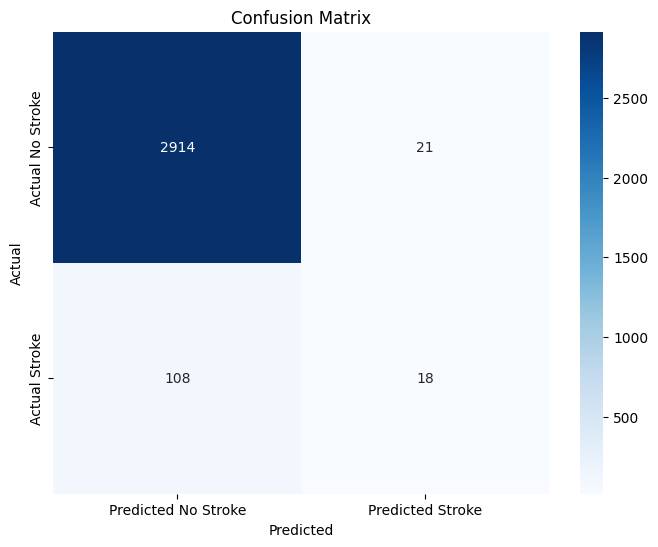

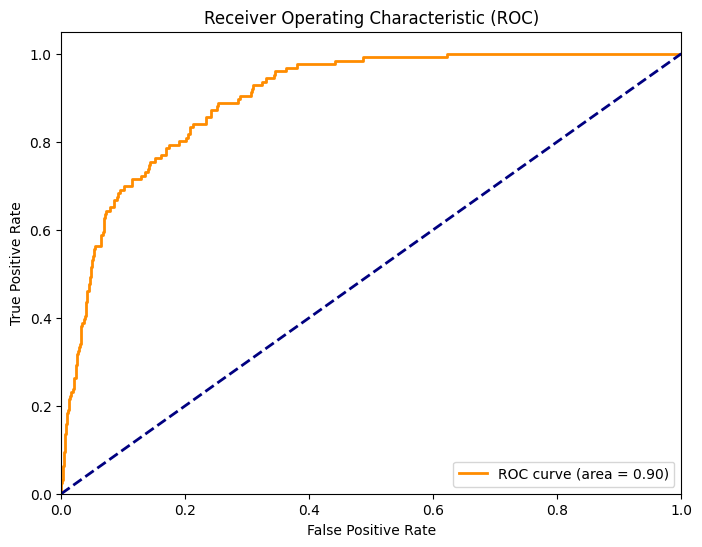

In [50]:
from sklearn.metrics import (precision_score,
                            recall_score,
                            f1_score,
                            roc_auc_score,
                            classification_report,
                            roc_curve)

# Make predictions on the test set
# y_pred
# Calculate evaluation metrics
# precision = precision_score(y_test_pass, y_pred)
# recall = recall_score(y_test_pass, y_pred)
# f1 = f1_score(y_test_pass, y_pred)

# Use the best model (grid_search.best_estimator_) to predict probabilities
roc_auc = roc_auc_score(y_test_pass, best_model.predict_proba(X_test_pass)[:, 1])
class_report = classification_report(y_test_pass, y_pred, digits=4)
class_report_dict = classification_report(y_test_pass, y_pred, output_dict=True)

macro_avg_f1 = class_report_dict['macro avg']['f1-score']
weighted_avg_f1 = class_report_dict['weighted avg']['f1-score']


# Print the evaluation metrics
print(class_report)
print(f"ROC AUC: {roc_auc:.4f}")


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test_pass, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Stroke', 'Predicted Stroke'],
            yticklabels=['Actual No Stroke', 'Actual Stroke'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_pass, best_model.predict_proba(X_test_pass)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Results with all features
<class 'pandas.core.frame.DataFrame'>
Index: 12242 entries, 3485 to 8924
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             12242 non-null  int64  
 1   hypertension       12242 non-null  int64  
 2   heart_disease      12242 non-null  int64  
 3   ever_married       12242 non-null  int64  
 4   work_type          12242 non-null  int64  
 5   residence_type     12242 non-null  int64  
 6   smoking_status     12242 non-null  int64  
 7   age                12242 non-null  float64
 8   avg_glucose_level  12242 non-null  float64
 9   bmi                12242 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 1.0 MB
Reclassifying work_type as categorical based on unique values.
Reclassifying smoking_status as categorical based on unique values.
['work_type', 'smoking_status']
['gender', 'hypertension', 'heart_disease', 'ever_married', 'residence_type', '

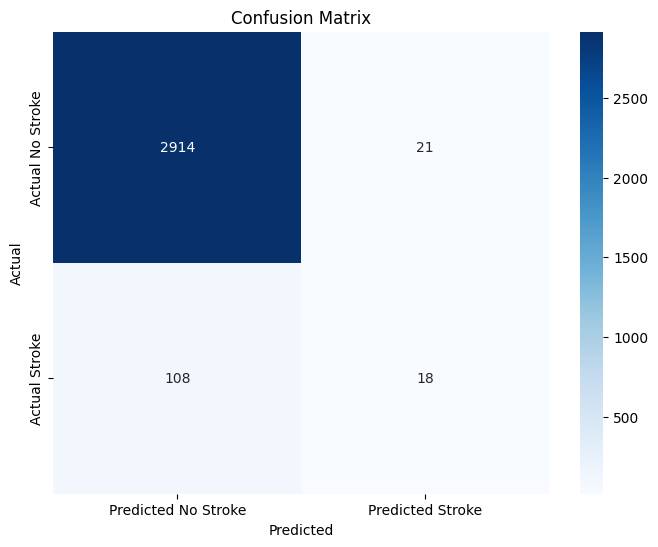

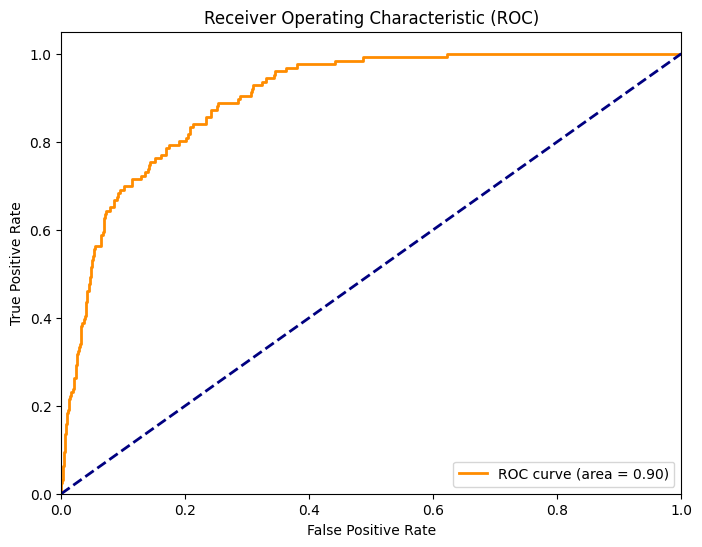

In [51]:
print("Results with all features")
#final_X = X.drop(columns=['ever_married'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_pass, y_pass = get_pass_data(X_train, y_train)
X_test_pass, y_test_pass = get_pass_data(X_test, y_test, False)

finalgskfold = get_gskf_pipeline(X_pass, params)
finalgskfold.fit(X_pass, y_pass)

final_best_model = finalgskfold.best_estimator_
y_pred = final_best_model.predict(X_test_pass)

roc_auc = roc_auc_score(y_test_pass, final_best_model.predict_proba(X_test_pass)[:, 1])
class_report = classification_report(y_test_pass, y_pred, digits=4)
class_report_dict = classification_report(y_test_pass, y_pred, digits=4, output_dict=True)

macro_avg_f1 = class_report_dict['macro avg']['f1-score']
weighted_avg_f1 = class_report_dict['weighted avg']['f1-score']

print(class_report)
print(f"ROC AUC: {roc_auc:.4f}")

# Create the confusion matrix
cm = confusion_matrix(y_test_pass, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Stroke', 'Predicted Stroke'],
            yticklabels=['Actual No Stroke', 'Actual Stroke'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_pass, final_best_model.predict_proba(X_test_pass)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#results.loc['wo ever_married residence_type'] = {'macro_avg_f1': macro_avg_f1, 'weighted_avg_f1': weighted_avg_f1, 'roc_auc': roc_auc}

In [52]:
X_test_no_idx = X_test.reset_index(drop=True)
y_test_no_idx = y_test.reset_index(drop=True)
X_test_pass, y_test_pass = get_pass_data(X_test_no_idx, y_test_no_idx)
y_test_pred = final_best_model.predict_proba(X_test_pass)

X_no_idx = X.reset_index(drop=True)
y_no_idx = y.reset_index(drop=True)
X_all_pass, y_all_pass = get_pass_data(X_no_idx, y_no_idx)
y_all_pred = final_best_model.predict_proba(X_all_pass)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3061 entries, 0 to 3060
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3061 non-null   int64  
 1   hypertension       3061 non-null   int64  
 2   heart_disease      3061 non-null   int64  
 3   ever_married       3061 non-null   int64  
 4   work_type          3061 non-null   int64  
 5   residence_type     3061 non-null   int64  
 6   smoking_status     3061 non-null   int64  
 7   age                3061 non-null   float64
 8   avg_glucose_level  3061 non-null   float64
 9   bmi                3061 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 239.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15303 entries, 0 to 15302
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15303 non-null  int64  
 1   hyperte

In [53]:
len(y_test_pred)

3061

In [54]:
y_prob = pd.Series(y_test_pred[:, 1], name='stroke_prob')

In [55]:
df_prob = pd.concat([X_test_no_idx, y_prob], axis = 1)

In [56]:
df_prob

,gender,hypertension,heart_disease,ever_married,work_type,residence_type,smoking_status,age,avg_glucose_level,bmi,stroke_prob
0,female,no,no,yes,private,rural,never smoked,35.0,69.72,26.0,0.019198
1,female,no,no,yes,private,urban,unknown,31.0,97.24,29.0,0.022961
2,female,no,no,no,private,rural,unknown,23.0,68.61,20.0,0.018046
3,female,no,no,yes,private,urban,formerly smoked,34.0,80.03,19.8,0.019270
4,female,no,no,yes,private,urban,never smoked,42.0,55.46,25.9,0.019179
...,...,...,...,...,...,...,...,...,...,...,...
3056,female,no,no,yes,private,urban,never smoked,20.0,103.45,25.1,0.019892
3057,female,no,no,yes,private,urban,smokes,41.0,90.44,25.5,0.020789
3058,female,yes,no,no,private,rural,never smoked,32.0,83.75,44.5,0.022941
3059,male,no,no,no,children,urban,unknown,10.0,59.17,20.3,0.018020


[ 4.29277567 14.6484375  23.29780564 32.01396648 41.05042017 50.18589744
 58.6        67.30555556 77.86639676]


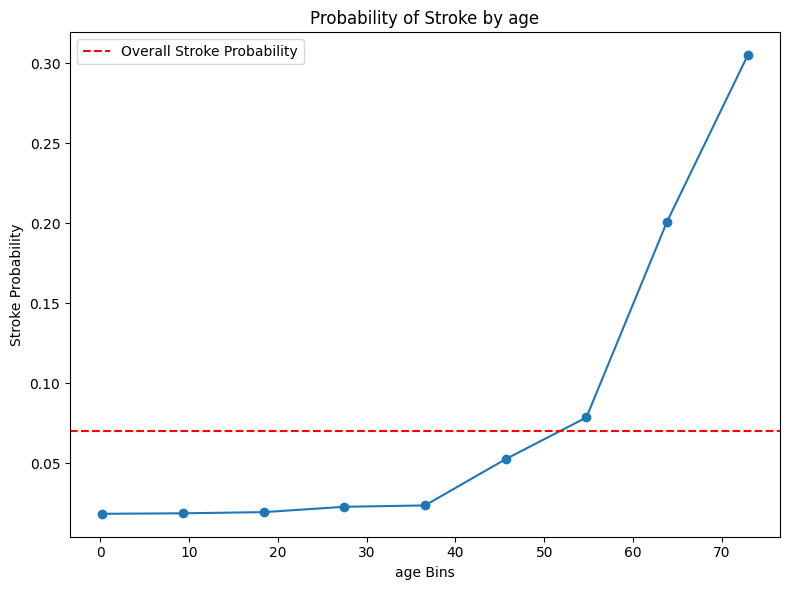

[ 69.37282908  89.49338668 110.05744444 137.00181818 158.38181818
 187.59176471 207.61605263 230.02814815 249.958     ]


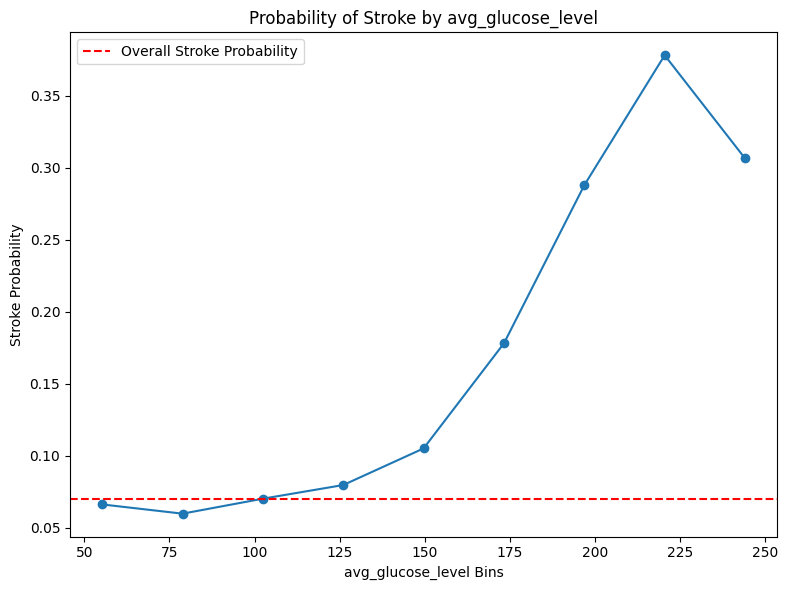

[17.40089286 22.56705277 27.8817029  33.24402516 39.17268722 44.6078125
 50.3875     54.92222222 62.8       ]


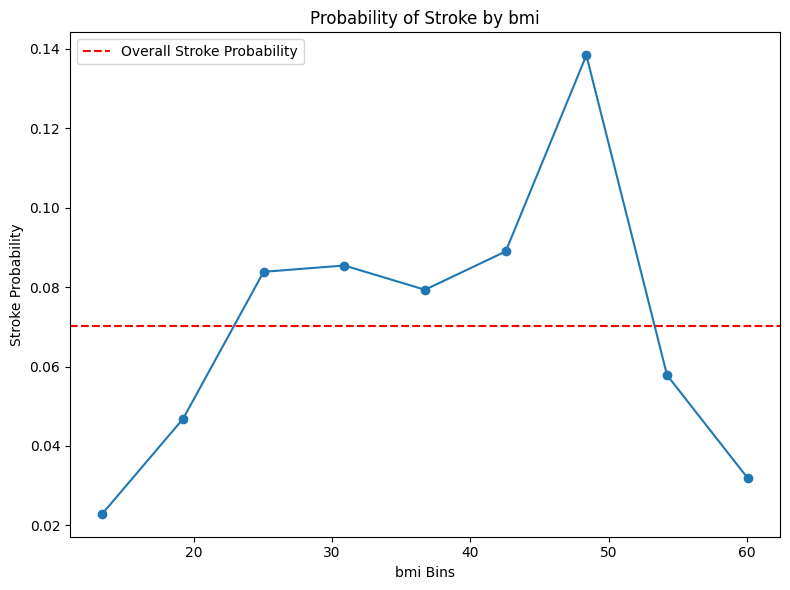

[0.03144766 0.14095833 0.22721022 0.30887454 0.39397249 0.48161404
 0.56398741 0.64444816 0.71963306]


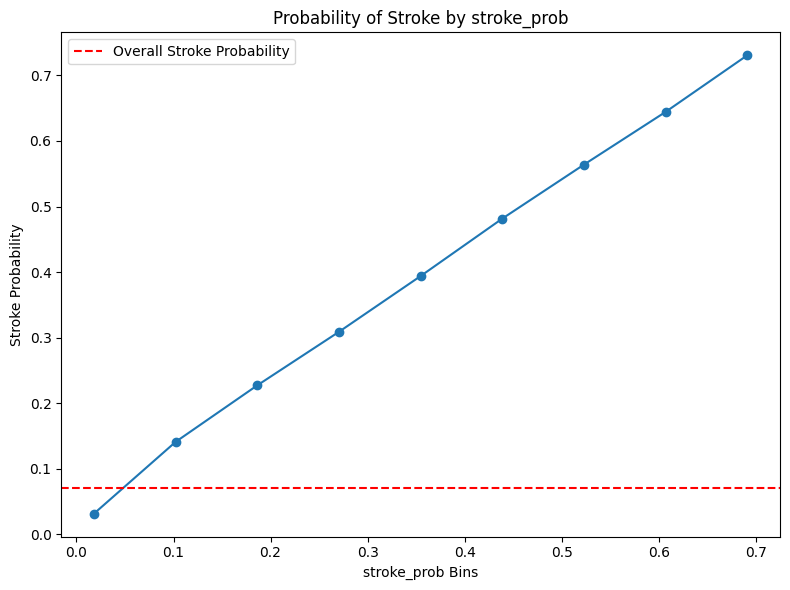

In [57]:
def prob_bins(df):
    num_cols = df.select_dtypes(include=['number']).columns.tolist()
    overall_stroke_prob = df['stroke_prob'].mean()
    for col in num_cols:
        # Define bin edges with increased bins (e.g., 10 bins)
        bin_edges = np.linspace(df[col].min(), df[col].max(), 10)
        means = []
        for i in range(len(bin_edges) - 1):
            bin_mean = df[(df[col] >= bin_edges[i]) & (df[col] < bin_edges[i + 1])][col]
            if not bin_mean.empty:
                bin_mean = bin_mean.mean()
                means.append(bin_mean)
            else:
                means.append((bin_edges[i] + bin_edges[i + 1])/2)
        means = np.array(means)

        # Categorize data into bins
        df['bins'] = pd.cut(df[col], bins=bin_edges, labels=False, include_lowest=True)

        # Calculate stroke probability within bins
        stroke_prob = df.groupby('bins')['stroke_prob'].mean()

        # Plot probabilities as a curve
        print(means[stroke_prob.index.tolist()])
        means = means[stroke_prob.index.tolist()]
        edgs = bin_edges[stroke_prob.index.tolist()]
        means = edgs

        plt.figure(figsize=(8, 6))
        plt.plot(means, stroke_prob.values, marker='o', linestyle='-')  # Use plot instead of bar
        plt.axhline(y=overall_stroke_prob, color='red', linestyle='--', label='Overall Stroke Probability')
        plt.title(f'Probability of Stroke by {col}')
        plt.xlabel(f'{col} Bins')
        plt.ylabel('Stroke Probability')
        plt.legend()
        # plt.xticks(means, rotation=45, ha='right')  # Set x-axis ticks to bin indices
        plt.tight_layout()
        plt.show()

        df = df.drop('bins', axis=1)  # Remove temporary 'bins' column

prob_bins(df_prob.copy())

In [85]:
stroke_probs = df_prob.groupby('work_type')['stroke_prob'].mean()

In [86]:
custom_order = ['private','self-employed', 'govt_job', 'children', 'never_worked']
stroke_probs = stroke_probs.reindex(custom_order)
stroke_probs

work_type
private          0.067949
self-employed    0.132983
govt_job         0.068878
children         0.018987
never_worked     0.018535
Name: stroke_prob, dtype: float64

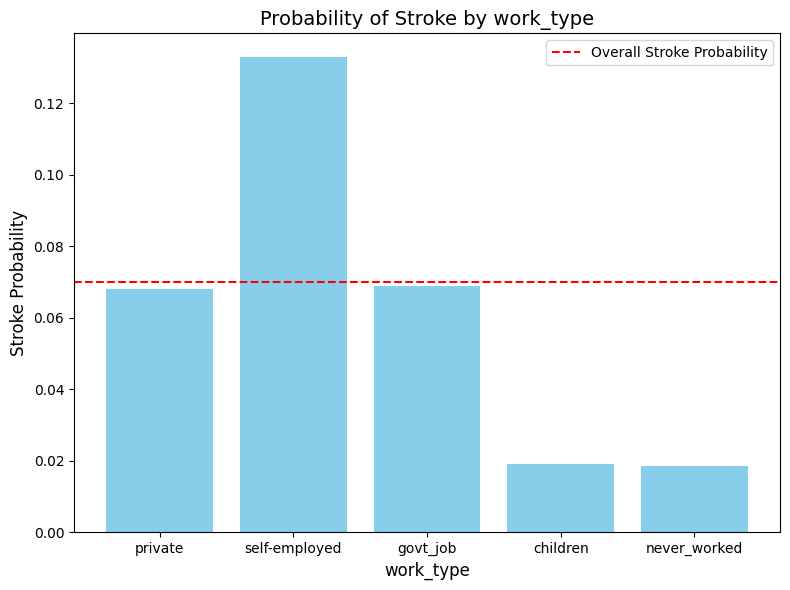

In [87]:

overall_stroke_prob = df_prob['stroke_prob'].mean() 
        

plt.figure(figsize=(8, 6))

# Probability plot with styling and baseline
plt.bar(stroke_probs.index, stroke_probs.values, color="skyblue")
plt.axhline(y=overall_stroke_prob, color='red', linestyle='--', label='Overall Stroke Probability')  # Add baseline
plt.title(f'Probability of Stroke by work_type', fontsize=14)
plt.xlabel('work_type', fontsize=12)
plt.ylabel('Stroke Probability', fontsize=12)
plt.legend()  # Show legend for baseline

plt.tight_layout()
plt.show()

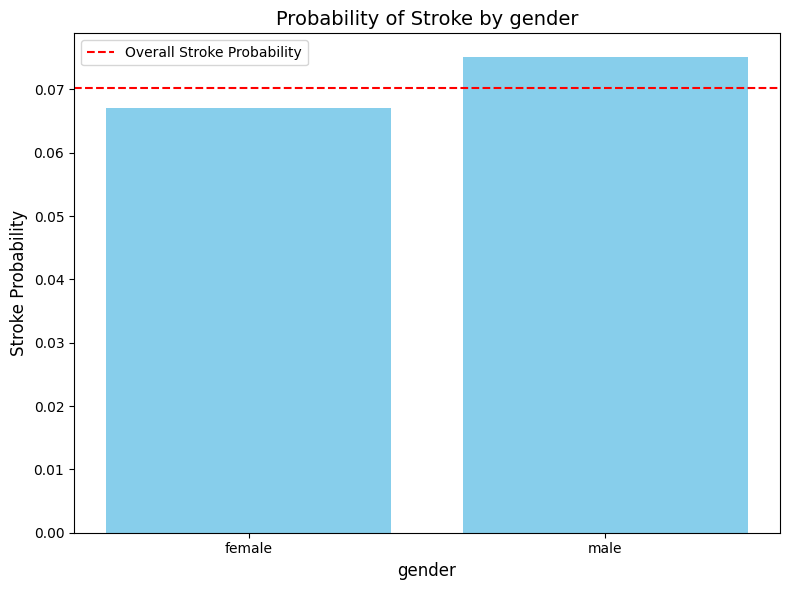

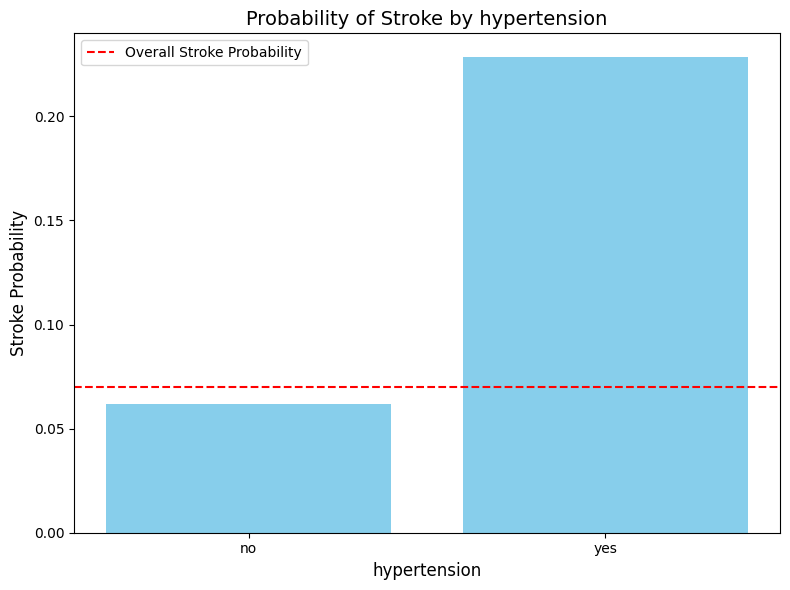

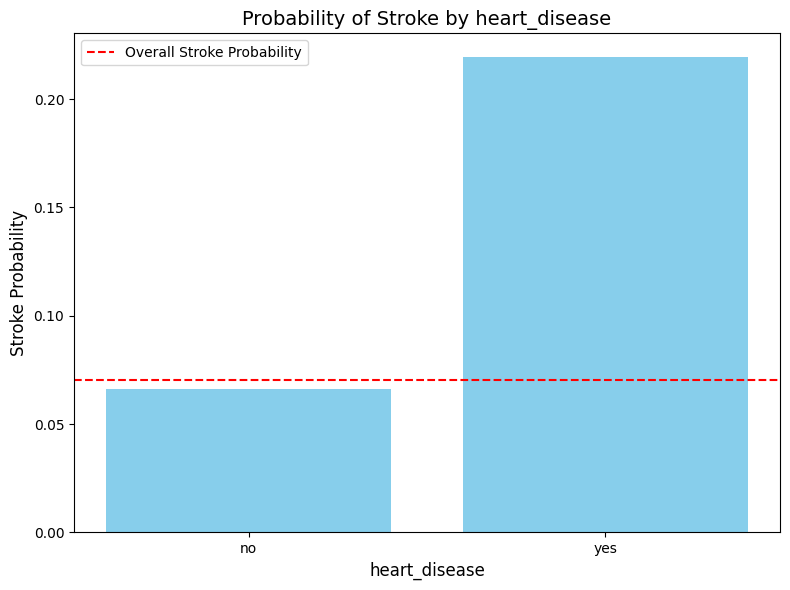

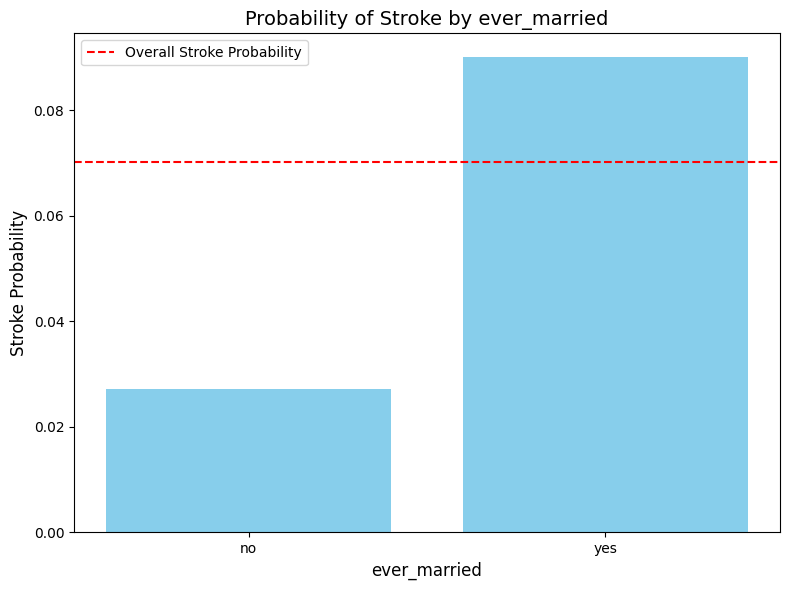

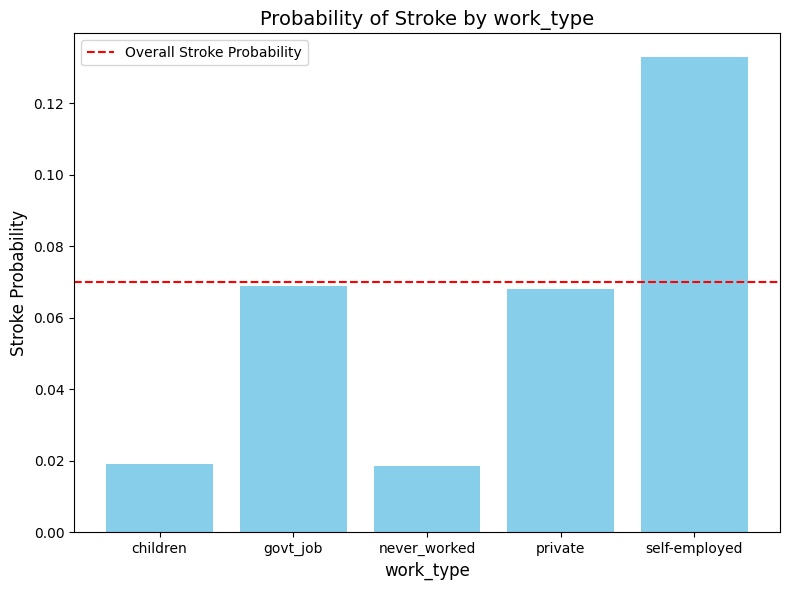

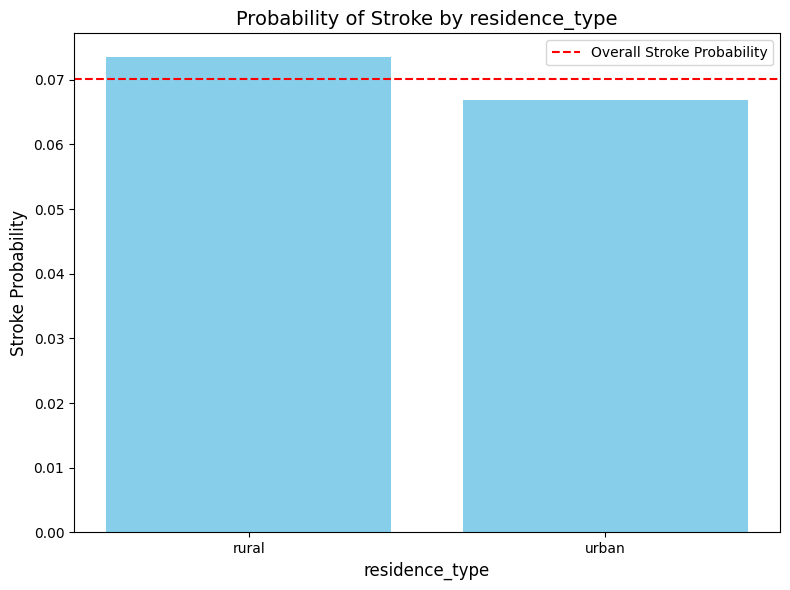

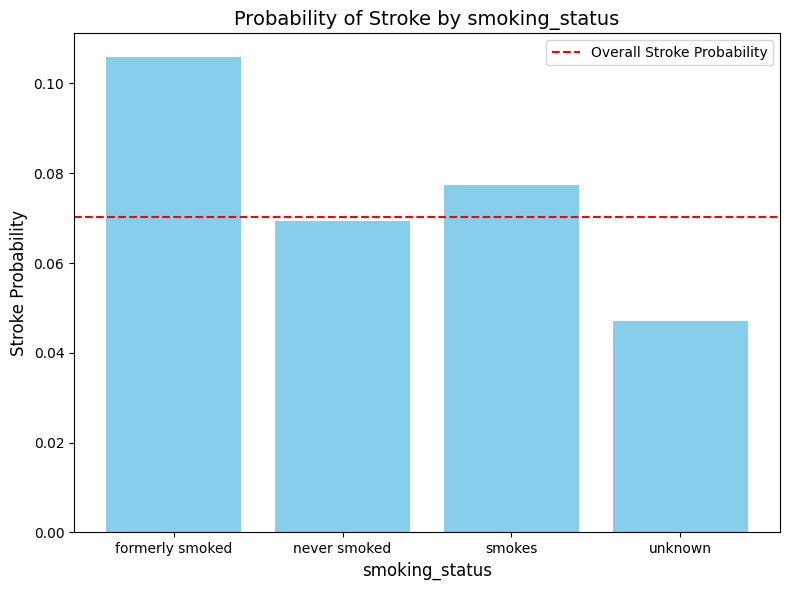

In [58]:
def cat_density_and_prob_plot(df):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    overall_stroke_prob = df['stroke_prob'].mean()  # Calculate overall stroke probability

    for col in categorical_cols:
        # Calculate stroke probability for each category value
        stroke_probs = df.groupby(col)['stroke_prob'].mean()

        

        plt.figure(figsize=(8, 6))

        # Probability plot with styling and baseline
        plt.bar(stroke_probs.index, stroke_probs.values, color="skyblue")
        plt.axhline(y=overall_stroke_prob, color='red', linestyle='--', label='Overall Stroke Probability')  # Add baseline
        plt.title(f'Probability of Stroke by {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Stroke Probability', fontsize=12)
        plt.legend()  # Show legend for baseline

        plt.tight_layout()
        plt.show()

cat_density_and_prob_plot(df_prob.copy())

In [66]:
max(X_test_pass['avg_glucose_level'])

267.6

In [59]:
def predict_proba(X):
    return best_model.predict_proba(X)

best_model.predict = predict_proba  # Overwrite the predict method

[0.07215091 0.06884388]
[0 1]


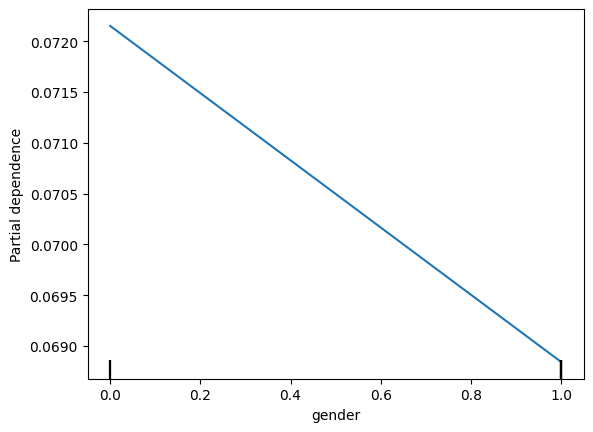

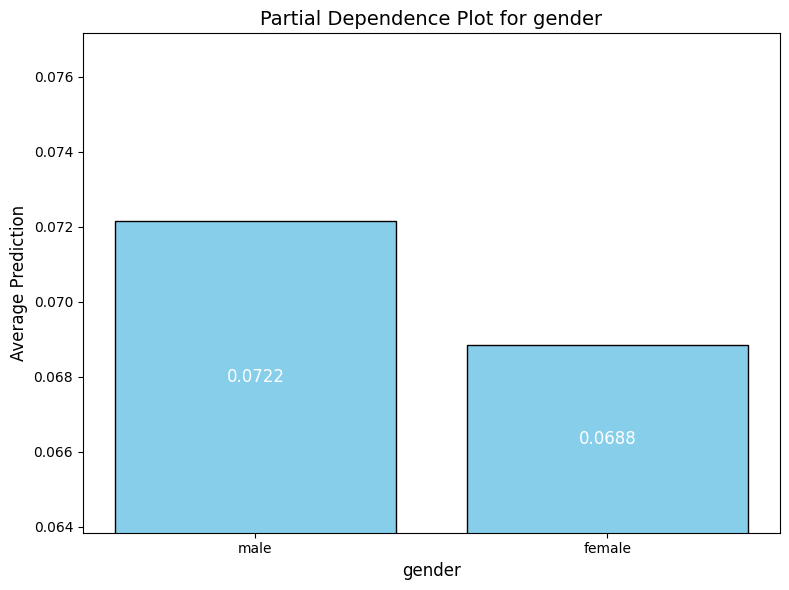

[0.06867265 0.09229671]
[0 1]


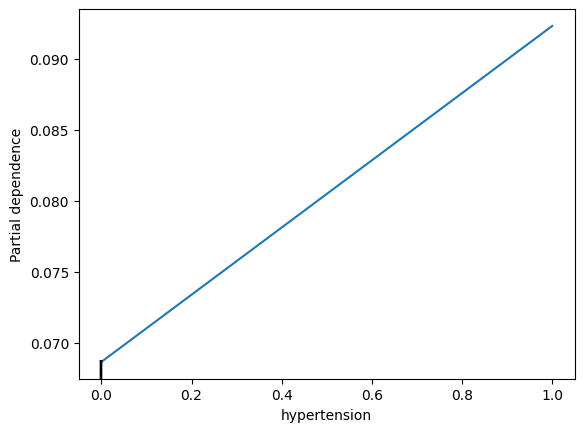

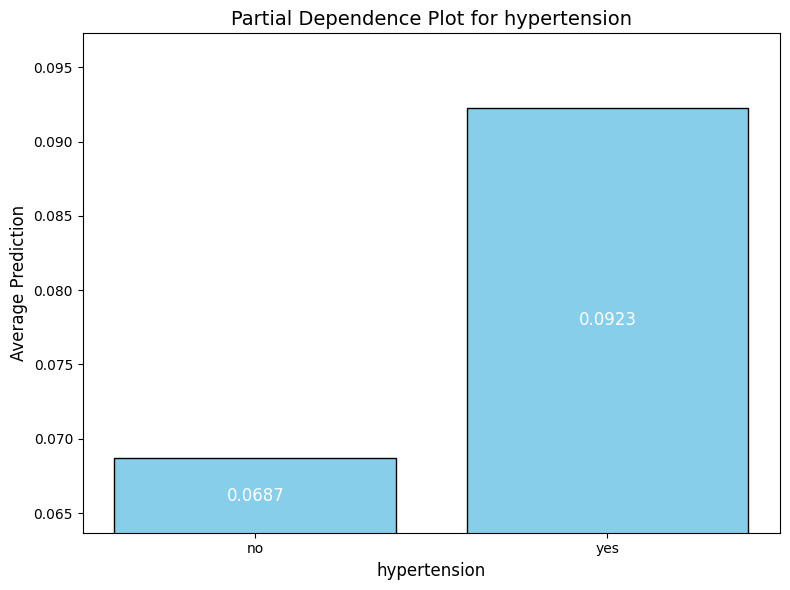

[0.07061998 0.08685304]
[0 1]


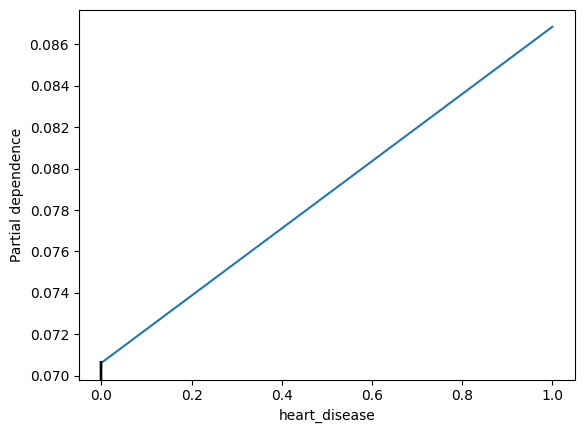

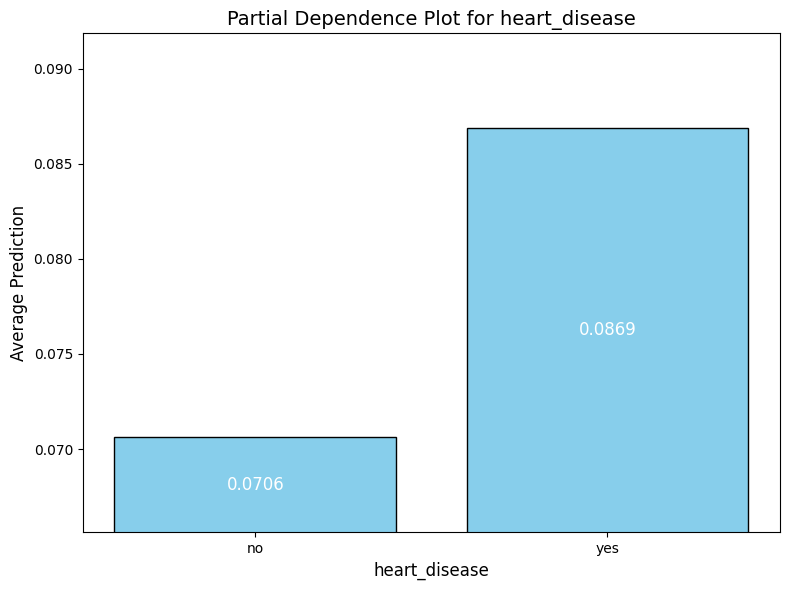

[0.07854496 0.07066071]
[0 1]


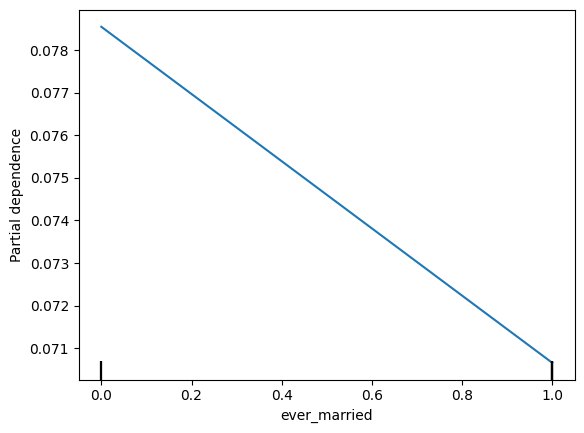

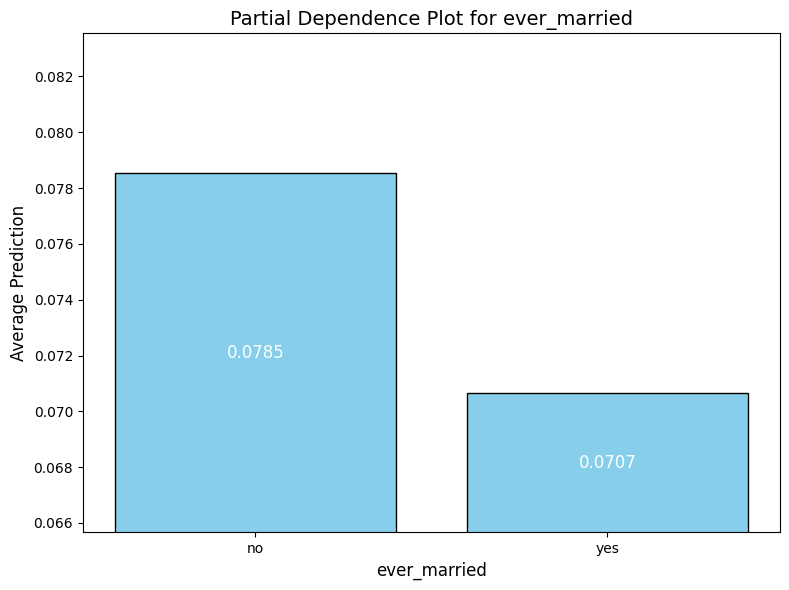

[0.07455198 0.06346277 0.0730043  0.06552321 0.07262319]
[0 1 2 3 4]


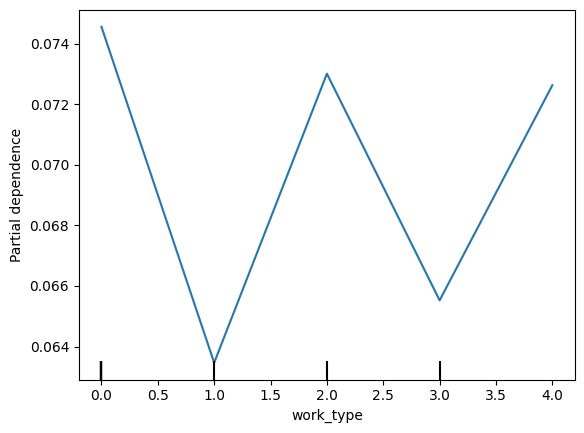

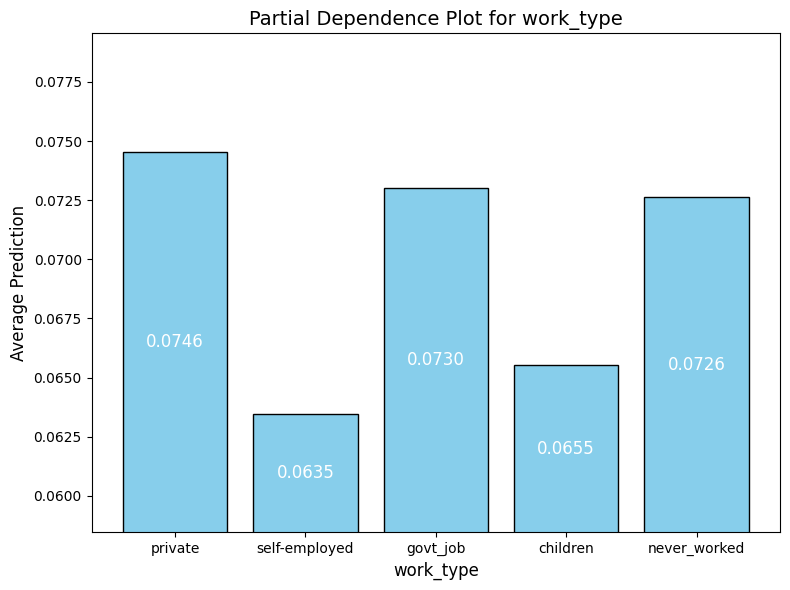

[0.0695394  0.07038292]
[0 1]


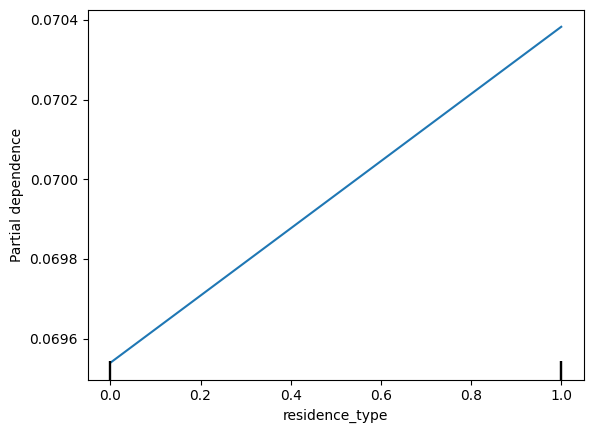

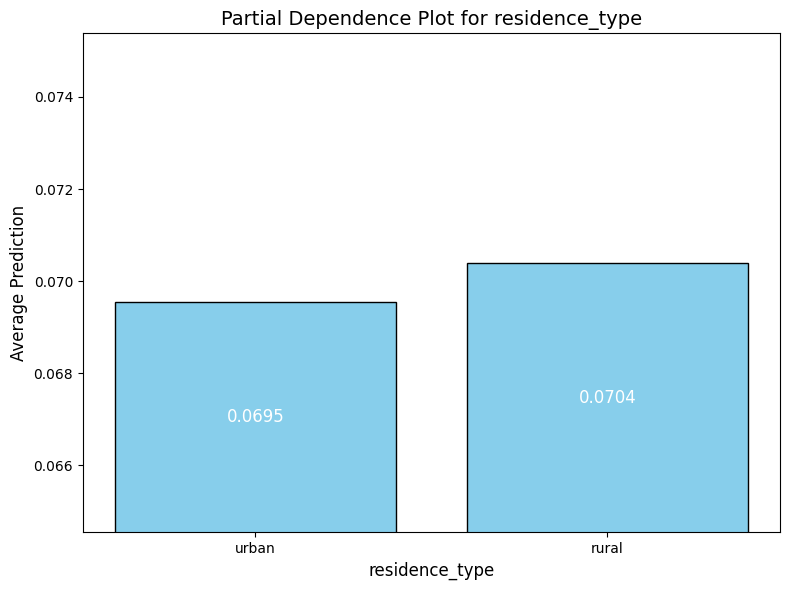

[0.06991055 0.06592362 0.08266178 0.07086525]
[0 1 2 3]


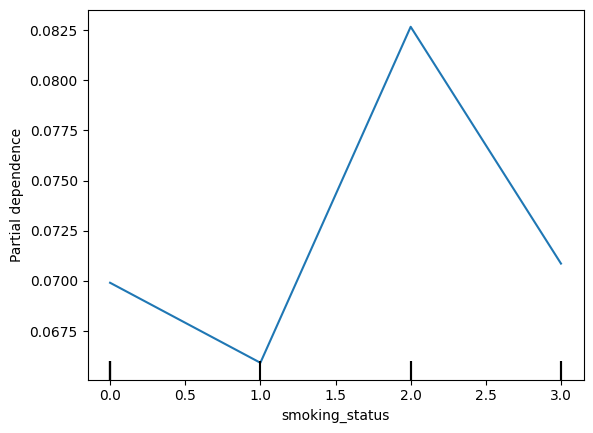

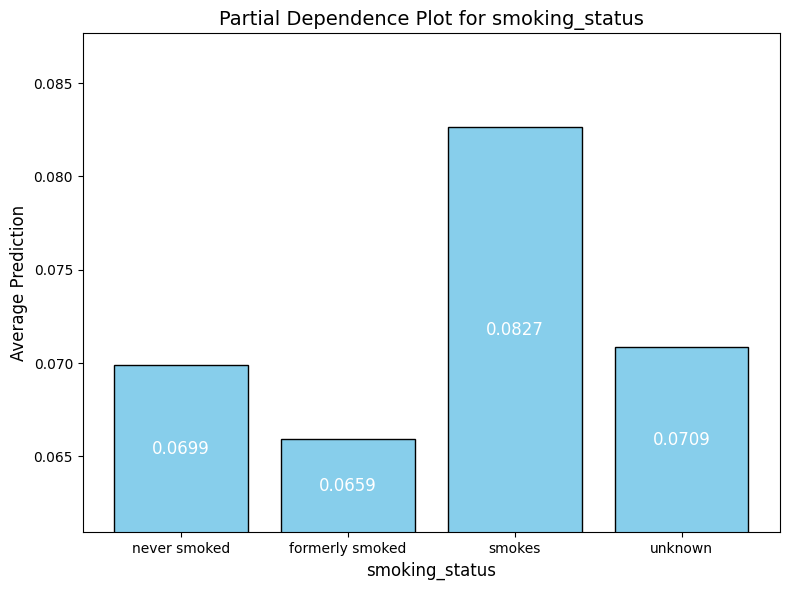

In [60]:
from sklearn.inspection import PartialDependenceDisplay

num_features = len(X_test_pass.columns)

categorical_cols = X_test_no_idx.select_dtypes(include=['object', 'category']).columns.tolist()
# Iterate through features and plot on subplots
for i, feature in enumerate(categorical_cols):
    # Create the PartialDependenceDisplay object for the current feature
    display = PartialDependenceDisplay.from_estimator(
        best_model,
        X_test_pass,
        [feature],
        kind="average",
        n_jobs=-1,
        grid_resolution=20  # Grid resolution is irrelevant for categorical features
    )
    
    # Extract the data for the current feature
    pd_values = display.pd_results[0]['average'][0]  # Partial dependence values
    feature_values = display.pd_results[0]['values'][0]  # Corresponding feature values
    print(pd_values)
    print(feature_values)

    if feature=='gender': feature_values=['male', 'female']
    elif feature=='residence_type': feature_values=['urban', 'rural']
    elif feature=='work_type': feature_values=['private', 'self-employed', 'govt_job', 'children', 'never_worked']
    elif feature=='smoking_status': feature_values=['never smoked', 'formerly smoked', 'smokes', 'unknown']
    else: feature_values=['no', 'yes']    
        
    plt.figure(figsize=(8, 6))
    plt.ylim(min(pd_values) - 0.005, max(pd_values) + 0.005)
    bars = plt.bar(feature_values, pd_values, color='skyblue', edgecolor='black')
    plt.bar_label(bars, label_type='center', color='white', fontsize=12, fmt="%.4f")
    
    # Customize the subplot
    plt.title(f"Partial Dependence Plot for {feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Average Prediction", fontsize=12)
    plt.tick_params(axis='both', labelsize=10)
    plt.tight_layout()
    plt.show()

[0.02329523 0.02296755 0.02297517 0.02309252 0.02317516 0.02335694
 0.02312437 0.02326889 0.02425723 0.02444975 0.02424409 0.03205534
 0.09460481 0.06901294 0.09290826 0.10373121 0.26593343 0.28970251
 0.25964468 0.4822557 ]
[ 0.24        4.54315789  8.84631579 13.14947368 17.45263158 21.75578947
 26.05894737 30.36210526 34.66526316 38.96842105 43.27157895 47.57473684
 51.87789474 56.18105263 60.48421053 64.78736842 69.09052632 73.39368421
 77.69684211 82.        ]


<Figure size 800x600 with 0 Axes>

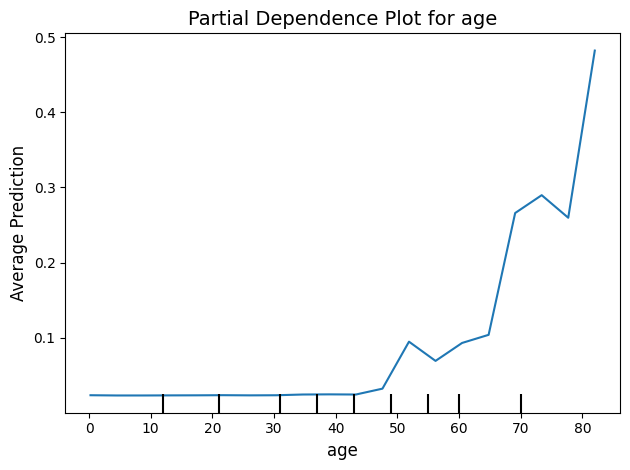

[0.05835705 0.05751865 0.07570151 0.06175146 0.05579232 0.07214569
 0.0870909  0.08728546 0.08936869 0.09491338 0.09737771 0.10153159
 0.1020543  0.11906351 0.12142917 0.11183945 0.12598771 0.12612928
 0.12517425 0.12438039]
[ 55.27        66.44526316  77.62052632  88.79578947  99.97105263
 111.14631579 122.32157895 133.49684211 144.67210526 155.84736842
 167.02263158 178.19789474 189.37315789 200.54842105 211.72368421
 222.89894737 234.07421053 245.24947368 256.42473684 267.6       ]


<Figure size 800x600 with 0 Axes>

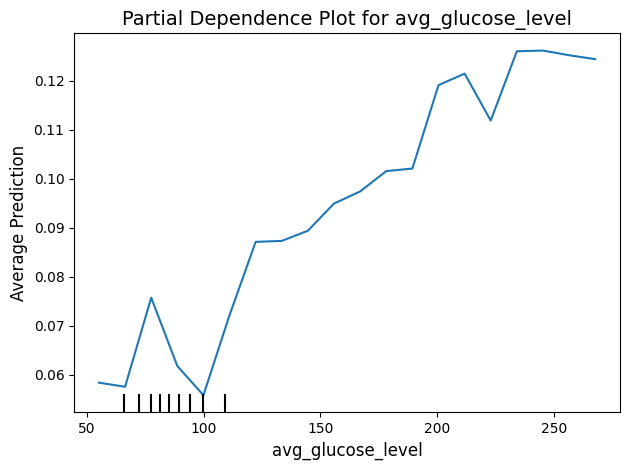

[0.06186537 0.05889684 0.06117311 0.06307495 0.06232482 0.07295125
 0.06208404 0.07554821 0.07496996 0.07223811 0.09627709 0.10137579
 0.10108302 0.09072078 0.08973807 0.08962807 0.08929532 0.08982238
 0.08981476 0.08981476]
[13.4        16.16315789 18.92631579 21.68947368 24.45263158 27.21578947
 29.97894737 32.74210526 35.50526316 38.26842105 41.03157895 43.79473684
 46.55789474 49.32105263 52.08421053 54.84736842 57.61052632 60.37368421
 63.13684211 65.9       ]


<Figure size 800x600 with 0 Axes>

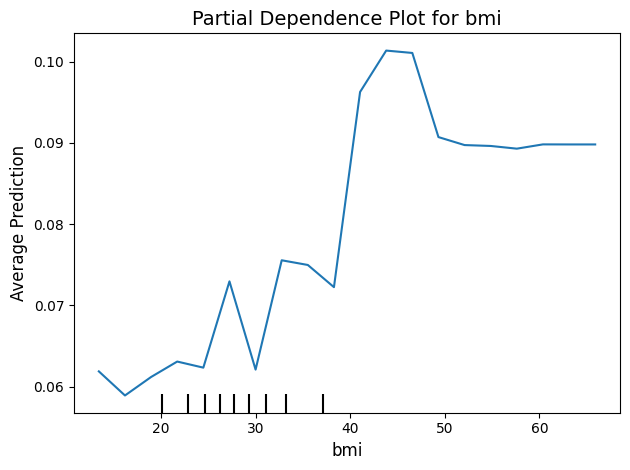

In [69]:
from sklearn.inspection import PartialDependenceDisplay

num_features = len(X_test_pass.columns)

categorical_cols = X_test_no_idx.select_dtypes(include=['number']).columns.tolist()
# Iterate through features and plot on subplots
for i, feature in enumerate(categorical_cols):
    # Create the PartialDependenceDisplay object for the current feature
    plt.figure(figsize=(8, 6))
    display = PartialDependenceDisplay.from_estimator(
        best_model,
        X_test_pass,
        [feature],
        kind="average",
        n_jobs=-1,
        percentiles=(0,1),
        grid_resolution=20  # Grid resolution is irrelevant for categorical features
    )
    
    # Extract the data for the current feature
    pd_values = display.pd_results[0]['average'][0]  # Partial dependence values
    feature_values = display.pd_results[0]['values'][0]  # Corresponding feature values
    print(pd_values)
    print(feature_values)
    
    # Customize the subplot
    plt.title(f"Partial Dependence Plot for {feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Average Prediction", fontsize=12)
    plt.tick_params(axis='both', labelsize=10)
    plt.tight_layout()
    plt.show()